# **Composite LEGO Object Detection - Tiny YOLO-v3**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Below are a bunch of things need to be installed

In [0]:
# Get darknet from source website
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

drive  sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 13357 (delta 8), reused 13 (delta 4), pack-reused 13331
Receiving objects: 100% (13357/13357), 12.04 MiB | 15.64 MiB/s, done.
Resolving deltas: 100% (9114/9114), done.


In [0]:
cp drive/'My Drive'/522_tiny_yolo/data_for_colab_lego.zip /content/darknet


In [0]:
cd darknet

/content/darknet


In [0]:
ls

3rdparty/               darknet_video.py         net_cam_v3.sh*
build/                  data/                    README.md
build.ps1*              data_for_colab_lego.zip  results/
build.sh*               image_yolov2.sh*         scripts/
cfg/                    image_yolov3.sh*         src/
cmake/                  include/                 video_v2.sh*
CMakeLists.txt          json_mjpeg_streams.sh*   video_yolov3.sh*
DarknetConfig.cmake.in  LICENSE
darknet.py              Makefile


In [0]:
!unzip data_for_colab_lego

Archive:  data_for_colab_lego.zip
   creating: data_for_colab_lego/
  inflating: data_for_colab_lego/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/data_for_colab_lego/
  inflating: __MACOSX/data_for_colab_lego/._.DS_Store  
  inflating: data_for_colab_lego/obj.data  
  inflating: __MACOSX/data_for_colab_lego/._obj.data  
  inflating: data_for_colab_lego/train.txt  
  inflating: __MACOSX/data_for_colab_lego/._train.txt  
  inflating: data_for_colab_lego/yolov3-tiny.conv.15  
  inflating: __MACOSX/data_for_colab_lego/._yolov3-tiny.conv.15  
  inflating: data_for_colab_lego/yolov3-tiny-obj.cfg  
  inflating: __MACOSX/data_for_colab_lego/._yolov3-tiny-obj.cfg  
  inflating: data_for_colab_lego/test.txt  
  inflating: __MACOSX/data_for_colab_lego/._test.txt  
  inflating: data_for_colab_lego/obj.names  
  inflating: __MACOSX/data_for_colab_lego/._obj.names  
   creating: data_for_colab_lego/data/
  inflating: data_for_colab_lego/data/348.png  
   creating: __MACOSX/data_for_colab

In [0]:
!apt-get update
!apt-get upgrade

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,81

In [0]:
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

In [0]:
!apt-get install libavcodec-dev libavformat-dev libswscale-d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d


In [0]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [0]:
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [0]:
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 6 not upgraded.
Need to get 6,724 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.3 [49.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.3 [70.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-runtime all 2:8.0.1453-1ubuntu1.3 [5,436 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim amd64 2:8.0.1453-

In [0]:
# ls

3rdparty/               darknet.py              __MACOSX/
appveyor.yml            darknet_video.py        Makefile
build/                  data/                   net_cam_v3.sh*
build.ps1*              data_for_colab/         README.md
build.sh*               data_for_colab.zip      scripts/
cfg/                    image_yolov2.sh*        src/
cmake/                  image_yolov3.sh*        test.txt
CMakeLists.txt          include/                train.txt
CMakeSettings.json      json_mjpeg_streams.sh*  video_v2.sh*
DarknetConfig.cmake.in  LICENSE                 video_yolov3.sh*


In [0]:
# #Now let's get some YOLOv3 weights from the official site
# !ls
# !wget https://pjreddie.com/media/files/yolov3.weights

In [0]:
# Modify the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

3rdparty	DarknetConfig.cmake.in	 image_yolov3.sh	README.md
build		darknet.py		 include		results
build.ps1	darknet_video.py	 json_mjpeg_streams.sh	scripts
build.sh	data			 LICENSE		src
cfg		data_for_colab_lego	 __MACOSX		video_v2.sh
cmake		data_for_colab_lego.zip  Makefile		video_yolov3.sh
CMakeLists.txt	image_yolov2.sh		 net_cam_v3.sh


In [0]:
!ls
%cd ../
!ls

3rdparty	DarknetConfig.cmake.in	 image_yolov3.sh	README.md
build		darknet.py		 include		results
build.ps1	darknet_video.py	 json_mjpeg_streams.sh	scripts
build.sh	data			 LICENSE		src
cfg		data_for_colab_lego	 __MACOSX		video_v2.sh
cmake		data_for_colab_lego.zip  Makefile		video_yolov3.sh
CMakeLists.txt	image_yolov2.sh		 net_cam_v3.sh
/content
darknet  drive	sample_data


In [0]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 6 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http

In [0]:
# This cell takes long time to execute
# Install CUDA
!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

# Install compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
!apt update
!apt upgrade
!apt install cuda-8.0 -y

6 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2020-05-07 17:11:44--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?iuorsJCh2N_AQ6B0eC66KyP31MGuc18QAe3HV4DpnqlwnlKIBJw7kWlaZEYfKrh78DxLiBpSKWMyT-bQ4WxEM7OkS19fE17pjbcmR_30QBbTThGK_GWJMJxEBG1CCgyS80lTF7tIZcbYZf0bTOwpKpNG6aisoYDEcu4QLpfF8e6uRaPkmNdZRxQcnC6DasPAVqzjLO0kQGQh2oab9OyEyde8hA [following]
--2020-05-07 17:11:44--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?iuorsJCh2N_AQ6B0eC66KyP31MGuc

In [0]:
# Check if GPU and CUDA was successfully installed
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)
print("'sup!'")
!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [0]:
%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb

In [0]:
# # Check if v3 works
# !ls
# !./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty	darknet			 image_yolov3.sh	README.md
backup		DarknetConfig.cmake.in	 include		results
build		darknet.py		 json_mjpeg_streams.sh	scripts
build.ps1	darknet_video.py	 LICENSE		src
build.sh	data			 __MACOSX		video_v2.sh
cfg		data_for_colab_lego	 Makefile		video_yolov3.sh
cmake		data_for_colab_lego.zip  net_cam_v3.sh		yolov3.weights
CMakeLists.txt	image_yolov2.sh		 obj
 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outpu

In [0]:
# show image 
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
# function to upload image  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
      
# function to download image
def download(path):
  from google.colab import files
  files.download(path)

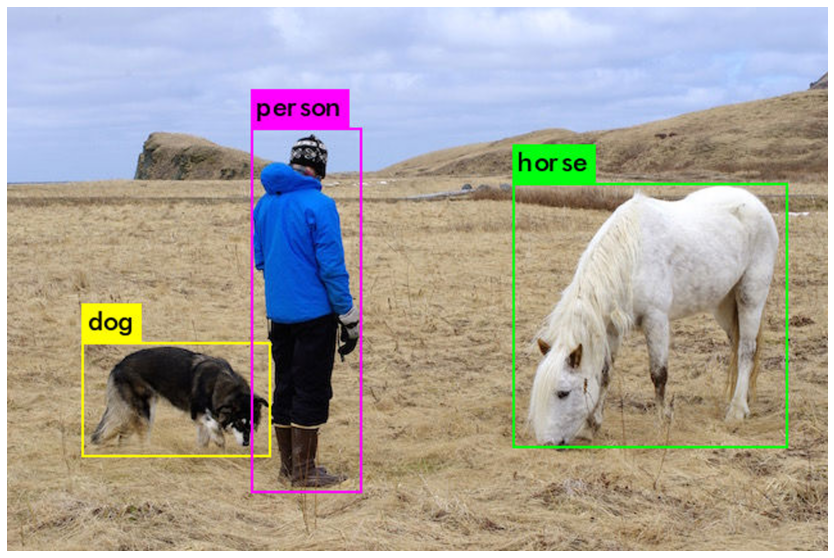

In [0]:
# imShow('predictions.jpg')

In [0]:
# ls

3rdparty/               darknet_video.py         net_cam_v3.sh*
backup/                 data/                    obj/
build/                  data_for_colab_lego/     predictions.jpg
build.ps1*              data_for_colab_lego.zip  README.md
build.sh*               image_yolov2.sh*         results/
cfg/                    image_yolov3.sh*         scripts/
cmake/                  include/                 src/
CMakeLists.txt          json_mjpeg_streams.sh*   video_v2.sh*
darknet*                LICENSE                  video_yolov3.sh*
DarknetConfig.cmake.in  __MACOSX/                yolov3.weights
darknet.py              Makefile


In [0]:
# Train tiny-YOLO model
# 1st parameter: path to customized .data file
# 2nd parameter: path to customized .cfg file 
# 3rd parameter: path to original weight file yolov3-tiny.conv.15
!./darknet detector train data_for_colab_lego/obj.data data_for_colab_lego/yolov3-tiny-obj.cfg data_for_colab_lego/yolov3-tiny.conv.15 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.636431, GIOU: 0.612048), Class: 0.548568, Obj: 0.247593, No Obj: 0.000108, .5R: 0.800000, .75R: 0.300000, count: 10, class_loss = 0.315569, iou_loss = 0.139119, total_loss = 0.454688 

 1462: 2.223495, 2.128180 avg loss, 0.001000 rate, 2.322664 seconds, 93568 images, 572.424950 hours left
Loaded: 0.487141 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.654249, GIOU: 0.637085), Class: 0.677329, Obj: 0.465513, No Obj: 0.007834, .5R: 0.913462, .75R: 0.269231, count: 104, class_loss = 2.723165, iou_loss = 1.207075, total_loss = 3.930240 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.553284, GIOU: 0.528863), Class: 0.710429, Obj: 0.272822, No Obj: 0.000096, .5R: 0.545455, .75R: 0.181818, count: 11, class_loss = 0.291962, iou_loss = 0.171489, total_loss = 0.463451 
v3 (

In [0]:
# ls

3rdparty/                  darknet.py               net_cam_v3.sh*
backup/                    darknet_video.py         obj/
build/                     data/                    predictions.jpg
build.ps1*                 data_for_colab_lego/     README.md
build.sh*                  data_for_colab_lego.zip  results/
cfg/                       image_yolov2.sh*         scripts/
chart.png                  image_yolov3.sh*         src/
chart_yolov3-tiny-obj.png  include/                 video_v2.sh*
cmake/                     json_mjpeg_streams.sh*   video_yolov3.sh*
CMakeLists.txt             LICENSE                  yolov3.weights
darknet*                   __MACOSX/
DarknetConfig.cmake.in     Makefile


In [0]:
# upload one image to test the model
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving 439.png to 439.png
saved file 439.png


In [0]:
# predict single image- tiny YOLO 
!./darknet detector test data_for_colab_lego/obj.data data_for_colab_lego/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights 12.png -i 0 


 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   

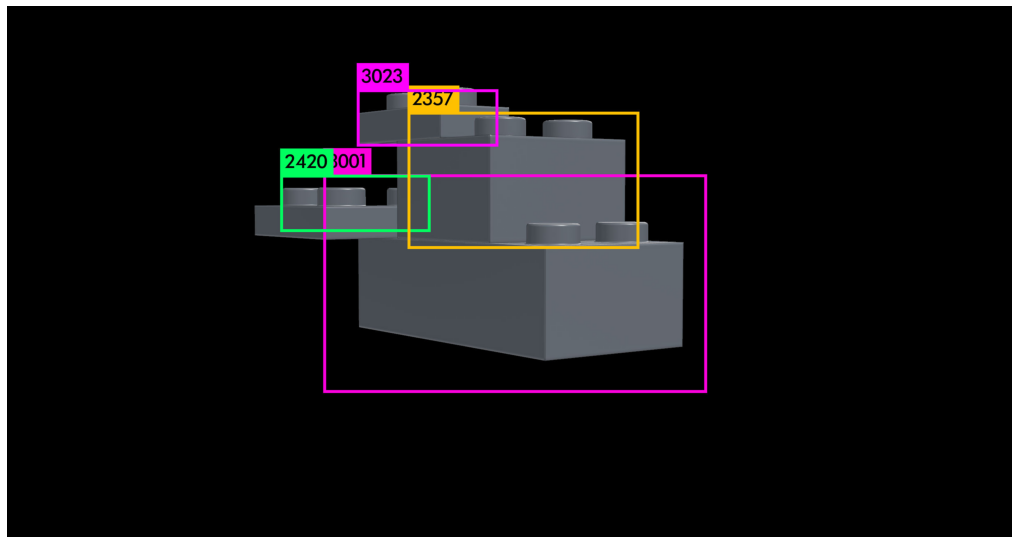

In [0]:
imShow('predictions.jpg')

In [0]:
# # predict single image- YOLO v3 
# !./darknet detector test data_for_colab_lego/obj.data data_for_colab_lego/yolov3_custom_train.cfg backup/yolov3_custom_train_2.weights 439.png -i 0 


 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv   

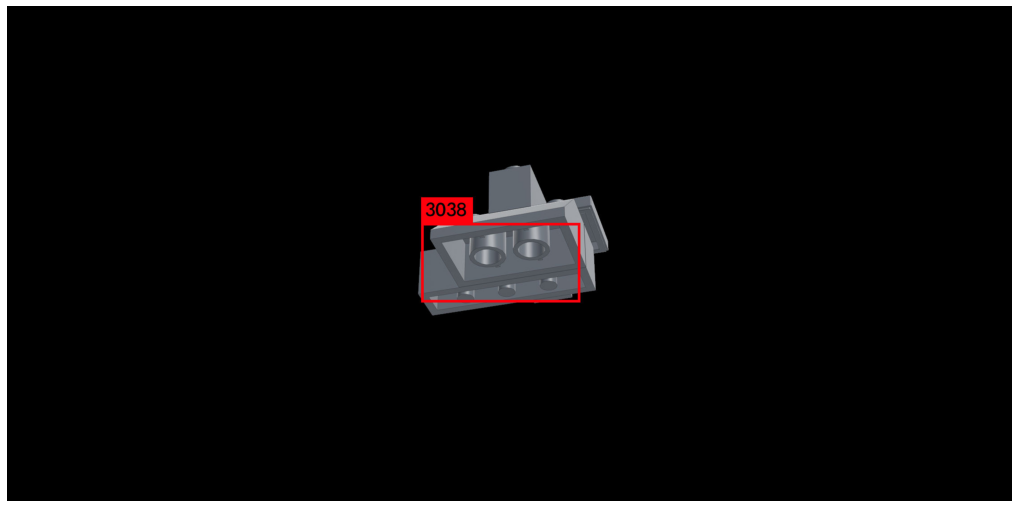

In [0]:
# imShow('predictions.jpg')

In [0]:
# predict single image- tiny yolo
!./darknet detector test data_for_colab_lego/obj.data data_for_colab_lego/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights 990.png -i 0 

# !./darknet detector test data_for_colab_lego/obj.data data_for_colab_lego/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights /content/darknet/test_images_one/assembled5_000/assembled5_000.jpg -i 0 -thresh 0.5

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max              

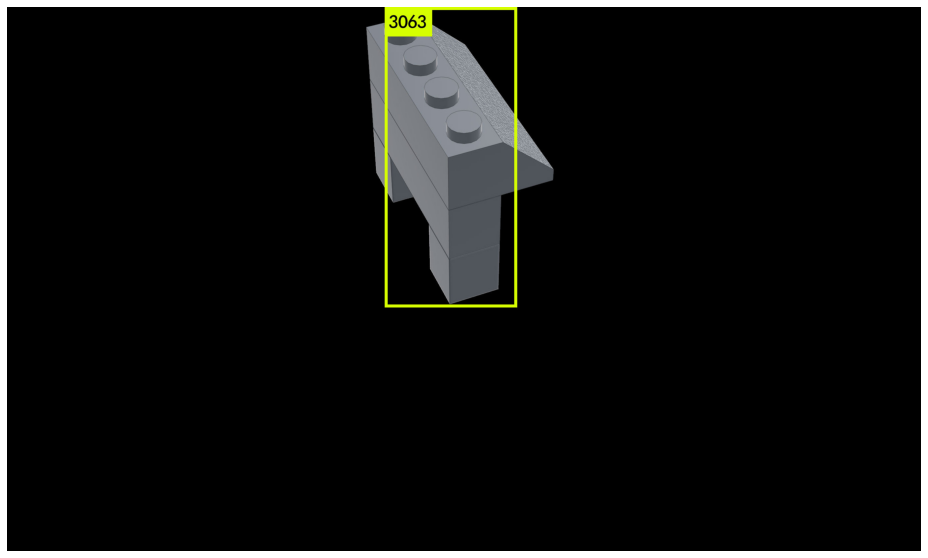

In [0]:
imShow('predictions.jpg')


In [0]:
cd ..

/content


In [0]:
# cp drive/'My Drive'/helmet/bike1.mp4 /content/darknet



In [0]:
cd darknet

/content/darknet


In [0]:
ls

3rdparty/     CMakeLists.txt          image_yolov3.sh*        results/
appveyor.yml  CMakeSettings.json      include/                scripts/
backup/       darknet*                json_mjpeg_streams.sh*  src/
bike.mp4      DarknetConfig.cmake.in  LICENSE                 test.jpg
build/        darknet.py              __MACOSX/               test.txt
build.ps1*    darknet_video.py        Makefile                train.txt
build.sh*     data/                   net_cam_v3.sh*          video_v2.sh*
cfg/          data_for_colab/         obj/                    video_yolov3.sh*
chart.png     data_for_colab.zip      predictions.jpg
cmake/        image_yolov2.sh*        README.md


In [0]:
# generate video using YOLO V3 model, test.mp4
!./darknet detector demo data_for_colab_lego/obj.data data_for_colab_lego/yolov3_custom_train.cfg backup/yolov3_custom_train_2.weights -dont_show test.mp4 -i 0 -out_filename test_out_v3.mp4

In [0]:
download('test_out.mp4') 

In [0]:
#  generate video using YOLO V3 model, assembled5.mp4
!./darknet detector demo data_for_colab_lego/obj.data data_for_colab_lego/yolov3_custom_train.cfg backup/yolov3_custom_train_2.weights -dont_show assembled5.mp4 -i 0 -out_filename assembled5_out_v3.mp4

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
Demo
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x

In [0]:
download('assembled5_out_v3.mp4') 

In [0]:
!./darknet detector demo data_for_colab_lego/obj.data data_for_colab_lego/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights  -dont_show assembled5.mp4 -i 0 -out_filename assembled5_out.mp4

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
Demo
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max         

In [0]:
download('assembled5_out.mp4') 

In [0]:
!./darknet detector calc_anchors Dataset/obj.data -num_of_clusters 5 -width 416 -height 416


 num_of_clusters = 5, width = 416, height = 416 
 read labels from 237 images 
 loaded 	 image: 30 	 box: 30

Wrong label: /content/darknet/Dataset/nfpa/pos-130.txt - j = 0, x = 0.508333, y = 0.473333, width = 1.010000, height = 0.613333 
 loaded 	 image: 73 	 box: 74

Wrong label: /content/darknet/Dataset/nfpa/pos-173.txt - j = 2, x = 0.440625, y = 0.969555, width = 0.000000, height = 0.000000 
 loaded 	 image: 236 	 box: 298Can't open label file. (This can be normal only if you use MSCOCO):  

 all loaded. 

 calculating k-means++ ...

 iterations = 13 


 avg IoU = 69.58 % 

Saving anchors to the file: anchors.txt 
anchors =   8, 17,  57, 75, 160,154, 199,284, 354,364
^C


In [0]:
# code references: https://medium.com/@today.rafi/train-your-own-tiny-yolo-v3-on-google-colaboratory-with-the-custom-dataset-2e35db02bf8f